# 12/15 Balmer-${\gamma}$ spectra acquisiton
Control both the stepping motor and the camera from this notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from lab_control.spectrometer import thr640

In [3]:
from FLI import FLI
import numpy as np
import time
import logging
import csv
import xarray as xr
from os.path import join

In [4]:
# logger
logger = thr640.logger
camera = FLI()
step_motor = thr640.THR640()

In [5]:
count=635000 # バルマーγ
step_motor.goto(count)
step_motor.waitUntilReady()

2021-01-27 21:43:06,087:INFO:getting status...
2021-01-27 21:43:12,973:INFO:Move to +635000
2021-01-27 21:43:13,079:INFO:getting status...
2021-01-27 21:43:19,108:INFO:getting status...


### 1回目

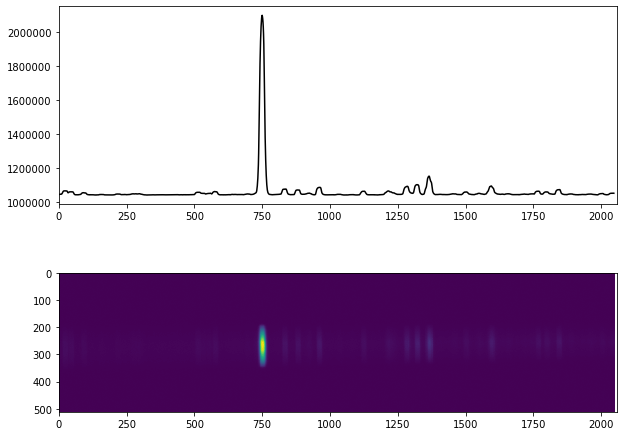

In [6]:
for i in range(3): # i = 0,1,2
    
    %run imaging_tool.py
    exposure = 1 * 1e3 # ms
    vbin = 1
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
    }
    
    camera.setExposureTime(exposure)
    camera.setVBin(vbin)
    camera.setImageArea(10,0,2058,512//vbin)
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    
    if i == 0:
        filepath = 'Plasma_635000r_1000ms_1_1.nc'.format(count)
        filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210127\Ballmer_gamma\75',filepath)
        data.to_netcdf(filepath)
        plot_image(image_data)
        
    elif i == 1:
        filepath = 'Plasma_635000r_1000ms_1_2.nc'.format(count)
        filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210127\Ballmer_gamma\75',filepath)
        data.to_netcdf(filepath)
        
    elif i == 2:
        filepath = 'Plasma_635000r_1000ms_1_3.nc'.format(count)
        filepath = join(r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210127\Ballmer_gamma\75',filepath)
        data.to_netcdf(filepath)

### 2回目

C:\data\75\Plasma_635000r_10ms_2_0.nc
C:\data\75\Plasma_635000r_10ms_2_1.nc
C:\data\75\Plasma_635000r_10ms_2_2.nc


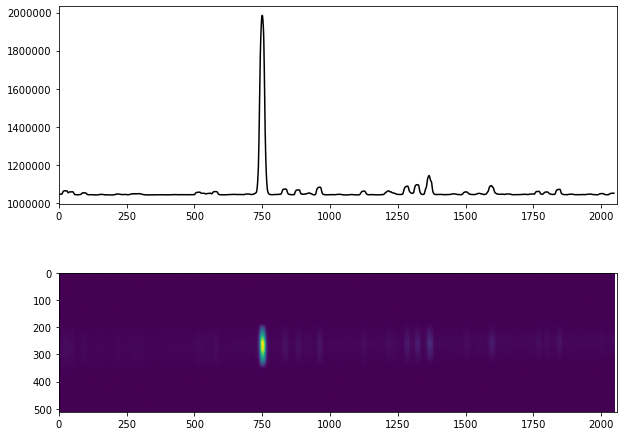

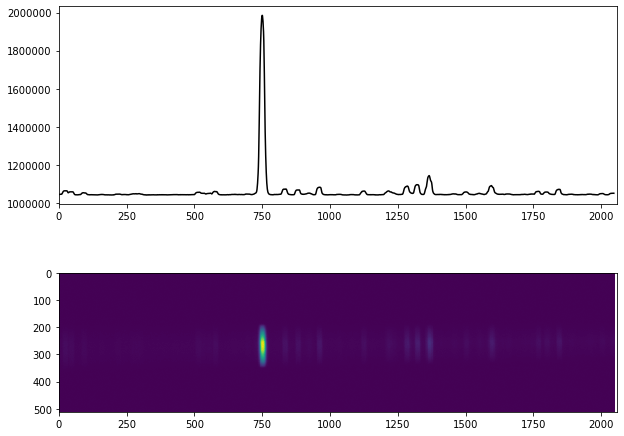

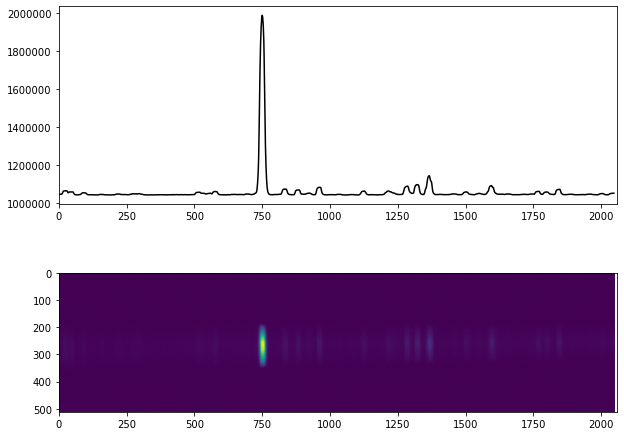

In [7]:
basepath = r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\Spectrometer\20210127\Ballmer_gamma\75'
basepath = r"C:\data\75"
for i in range(3): # i = 0,1,2
    
    %run imaging_tool.py
    exposure = 1 * 1e3 # ms
    vbin = 1
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
    }
    
    camera.setExposureTime(exposure)
    camera.setVBin(vbin)
    camera.setImageArea(10,0,2058,512//vbin)
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    
    filepath = f'Plasma_{count}r_10ms_2_{i}.nc'
    filepath = join(basepath,filepath)
    print(filepath)
    data.to_netcdf(filepath)
    plot_image(image_data)

### bg

C:\data\75\Plasma_635000r_1000ms_bg_0.nc
C:\data\75\Plasma_635000r_1000ms_bg_1.nc
C:\data\75\Plasma_635000r_1000ms_bg_2.nc


<Figure size 432x288 with 0 Axes>

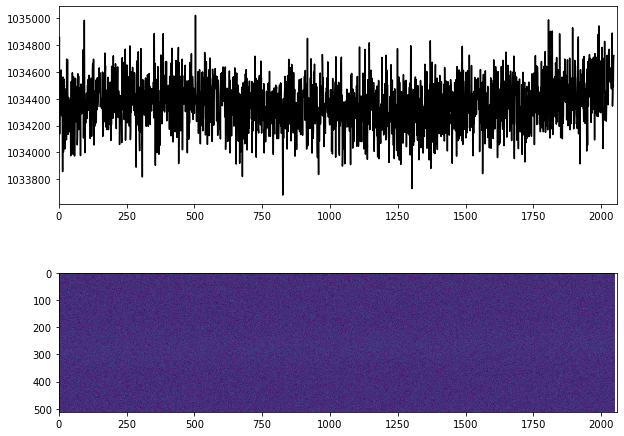

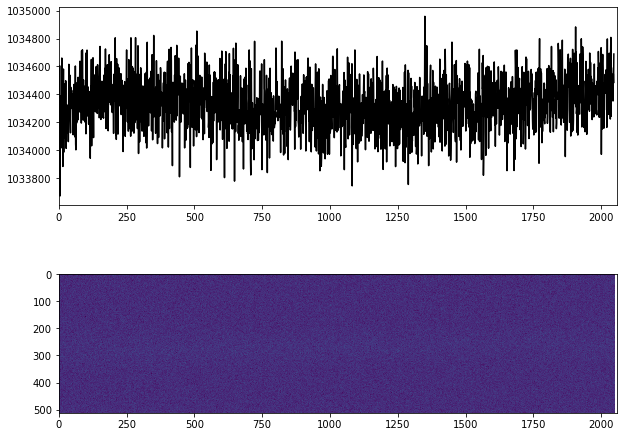

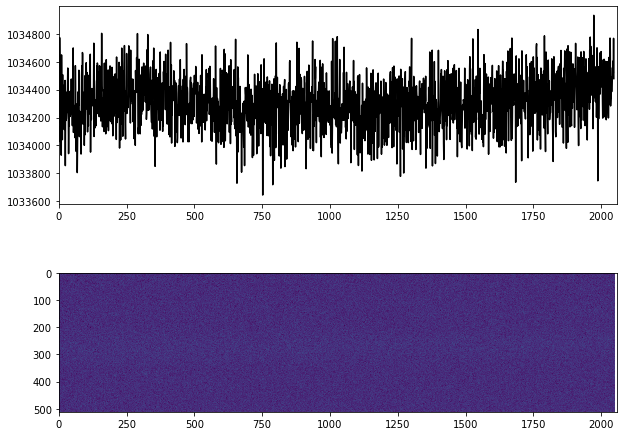

In [8]:
basepath = r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\Spectrometer\20210127\Ballmer_gamma\75'
basepath = r"C:\data\75"
for i in range(3): # i = 0,1,2
    
    %run imaging_tool.py
    exposure = 1 * 1e3 # ms
    vbin = 1
    attributes = {
        "temperature": camera.getTemperature(),
        "device_status": camera.getDeviceStatus(),
        "exposure": exposure,
        "frame_type": "light",
    }
    
    camera.setExposureTime(exposure)
    camera.setVBin(vbin)
    camera.setImageArea(10,0,2058,512//vbin)
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    
    filepath = f'Plasma_{count}r_1000ms_bg_{i}.nc'
    filepath = join(basepath,filepath)
    print(filepath)
    data.to_netcdf(filepath)
    plot_image(image_data)